In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/drive/My Drive/SpamFilter/emails.csv')

In [3]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
df['text'] = df['text'].apply(lambda x : str(x).replace('Subject:',''))

In [5]:
df['text'] = df['text'].apply(lambda x : str(x).replace('re:',''))
df['text'] = df['text'].apply(lambda x : str(x).replace('re :',''))

In [6]:
df.head()

,text,spam
0,naturally irresistible your corporate identit...,1
1,the stock trading gunslinger fanny is merril...,1
2,unbelievable new homes made easy im wanting ...,1
3,4 color printing special request additional ...,1
4,"do not have money , get software cds from her...",1


In [7]:
df['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

In [8]:
shuffled_df = df.sample(frac=1,random_state=4)

In [9]:
shuffled_df

,text,spam
5710,raptors here is the most recent version of t...,0
3120,"thomas knudsen steve , yes , please arrang...",0
5292,"var for enroncredit . com bryan , we shall...",0
186,confirmation request 218 - 791 we tried to c...,1
3804,osman sezgen steve kromer is requesting that...,0
...,...,...
3671,reminder stinson ( and vince - - don ' t thi...,0
709,you want to submit your website to search eng...,1
2487,eol trade size discrepancies vince - i have...,0
174,"my portfolio hi my name is ernie , i may no...",1


In [10]:
spam_df = shuffled_df.loc[shuffled_df['spam'] == 1]

In [11]:
nospam_df = shuffled_df.loc[shuffled_df['spam'] == 0].sample(n=1360,random_state=55)

In [12]:
len(spam_df),len(nospam_df)

(1368, 1360)

In [13]:
df_norm = pd.concat([spam_df,nospam_df])

In [14]:
df_norm

,text,spam
186,confirmation request 218 - 791 we tried to c...,1
535,exactseek - verify your site submission the ...,1
841,garden ornaments | ppu our delightful garden...,1
476,easy - tag board : : more options to fit your...,1
1314,have you checked the latest - weekly special ...,1
...,...,...
4085,university of texas conference on energy fin...,0
3281,california update 4 / 27 / 01 the following ...,0
4137,"greg spaniolo resume johnny , greg spaniol...",0
4416,jcc study here is the information produced i...,0


In [15]:
df_norm.reset_index(inplace=True,drop=True)

In [16]:
df_norm

,text,spam
0,confirmation request 218 - 791 we tried to c...,1
1,exactseek - verify your site submission the ...,1
2,garden ornaments | ppu our delightful garden...,1
3,easy - tag board : : more options to fit your...,1
4,have you checked the latest - weekly special ...,1
...,...,...
2723,university of texas conference on energy fin...,0
2724,california update 4 / 27 / 01 the following ...,0
2725,"greg spaniolo resume johnny , greg spaniol...",0
2726,jcc study here is the information produced i...,0


In [17]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


In [19]:
ps = PorterStemmer()
a = []

In [20]:
for i in range(0,len(df_norm)):
  review = re.sub('[^a-zA-Z]',' ',df_norm['text'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  a.append(review)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2000)
X = cv.fit_transform(a).toarray()

In [22]:
X.shape

(2728, 2000)

In [23]:
y = df_norm.iloc[:,1].values

In [24]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 ,random_state = 42)

In [26]:
from sklearn.naive_bayes import MultinomialNB
spam_filter = MultinomialNB().fit(X_train,y_train)

In [27]:
y_pred = spam_filter.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_pred,y_test)

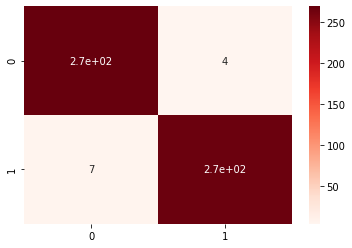

In [29]:
import seaborn as sns
sns.heatmap(conf,annot=True,cmap='Reds')

In [30]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred,y_test)

In [31]:
acc

0.9798534798534798